Wrapper Method - Backward and Forward Stepwise Regression

In [2]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

df = pd.read_csv('BMI.csv')

#Split the data into features and target
X = df.drop('fatpctg', axis=1)  # Replace 'target_variable_column' with the actual column name
y = df['fatpctg']

#Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Backward Stepwise Regression
def backward_stepwise_selection(X, y):
    cols = list(X.columns)
    p_values = [1]  # initialize with a p-value that will be higher than your significance level
    while len(cols) > 1:
        X_1 = X[cols]
        model = sm.OLS(y, X_1).fit()
        p_values = model.pvalues
        max_p_value = p_values.max()
        if max_p_value > 0.05:
            remove_feature = p_values.idxmax()
            cols.remove(remove_feature)
        else:
            break
    selected_features = cols
    return selected_features

backward_selected_features = backward_stepwise_selection(X_train, y_train)

print("backward features")
print(backward_selected_features)


#Forward Stepwise Regression
def forward_stepwise_selection(X, y):
    selected_features = []
    while len(selected_features) < len(X.columns):
        remaining_features = list(set(X.columns) - set(selected_features))
        p_values = []
        for feature in remaining_features:
            X_temp = X[selected_features + [feature]]
            model = sm.OLS(y, sm.add_constant(X_temp)).fit()
            p_value = model.pvalues[feature]
            p_values.append(p_value)
        best_feature = remaining_features[p_values.index(min(p_values))]
        selected_features.append(best_feature)
    return selected_features

forward_selected_features = forward_stepwise_selection(X_train, y_train)

print("forward features")
print(forward_selected_features)


backward features
['Age', 'Abdomen', 'Wrist']
forward features
['Abdomen', 'Wrist', 'Weight', 'Biceps', 'Age', 'Neck', 'Height', 'Forearm', 'Thigh', 'Hip', 'Chest', 'Ankle', 'Knee']


Filter Method using correlation statistics

   Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  Knee  Ankle  \
0   22   160.8    62.4  34.0   95.8     87.9   99.2   59.6  38.9   24.0   
1   22   170.6    80.5  38.5   93.6     83.0   98.7   58.7  37.3   23.4   
2   23   153.9    69.3  36.2   93.1     85.2   94.5   59.0  37.3   21.9   
3   23   157.1    70.4  35.5   92.1     77.1   93.9   56.1  36.1   22.7   
4   23   196.5    88.6  38.0   96.6     85.3  102.5   59.1  37.6   23.2   

   Biceps  Forearm  Wrist  fatpctg  
0    28.8     25.2   16.6     25.3  
1    30.5     28.9   18.2      6.1  
2    32.0     27.4   17.1     12.3  
3    30.5     27.2   18.2      9.4  
4    31.8     29.7   18.3     10.3  
fatpctg    1.000000
Abdomen    0.813432
Chest      0.702620
Hip        0.625201
Weight     0.612925
Thigh      0.559608
Knee       0.508665
Biceps     0.493271
Neck       0.490592
Forearm    0.361387
Wrist      0.346575
Age        0.291458
Ankle      0.265970
Height     0.133211
Name: fatpctg, dtype: float64


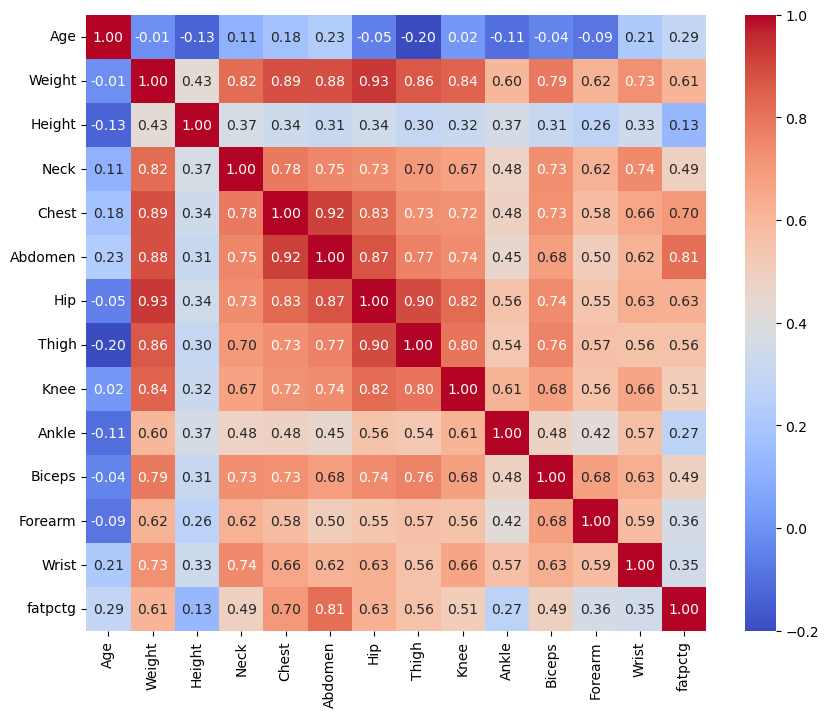

In [3]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('BMI.csv')

# Display the first few rows of the DataFrame to understand the data
print(df.head())

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Extract the correlation of each feature with the target variable 
correlation_with_target = correlation_matrix['fatpctg']

# Sort the features based on their absolute correlation with the target variable
sorted_features = correlation_with_target.abs().sort_values(ascending=False)

# Display the sorted features and their correlation values
print(sorted_features)

# Optionally, you can plot a heatmap of the correlation matrix for better visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


Embedded Method: Lasso Regression

Age        0.000000
Weight     0.000000
Height    -0.000000
Neck      -0.000000
Chest      0.000000
Abdomen    6.048901
Hip        0.000000
Thigh      0.000000
Knee       0.000000
Ankle     -0.000000
Biceps     0.000000
Forearm   -0.000000
Wrist     -0.000000
dtype: float64


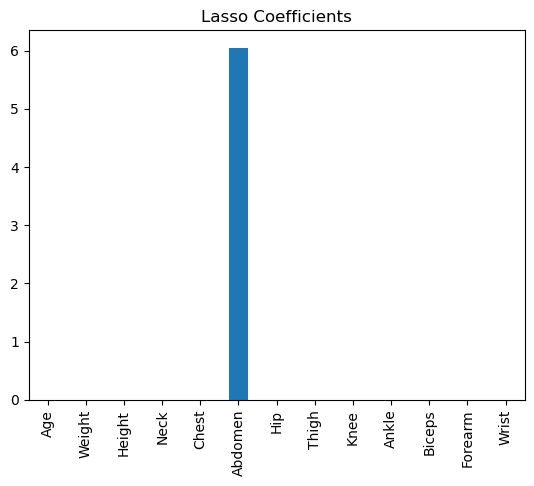

In [5]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('BMI.csv')

# Separate features (X) and target variable (y)
X = data.drop('fatpctg', axis=1)
y = data['fatpctg']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create Lasso regression model
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha parameter for different levels of regularization

# Fit the model on the training data
lasso_model.fit(X_train_scaled, y_train)

# Get the coefficients of the features
coefficients = pd.Series(lasso_model.coef_, index=X.columns)

# Print the coefficients
print(coefficients)

# Plot the coefficients
coefficients.plot(kind='bar')
plt.title('Lasso Coefficients')
plt.show()


Embedded Method: Random Forest

    Feature  Importance
5   Abdomen    0.731153
2    Height    0.029401
1    Weight    0.029395
12    Wrist    0.026041
8      Knee    0.023688
3      Neck    0.023267
6       Hip    0.022485
0       Age    0.022080
7     Thigh    0.020623
4     Chest    0.020444
9     Ankle    0.019897
10   Biceps    0.017453
11  Forearm    0.014072


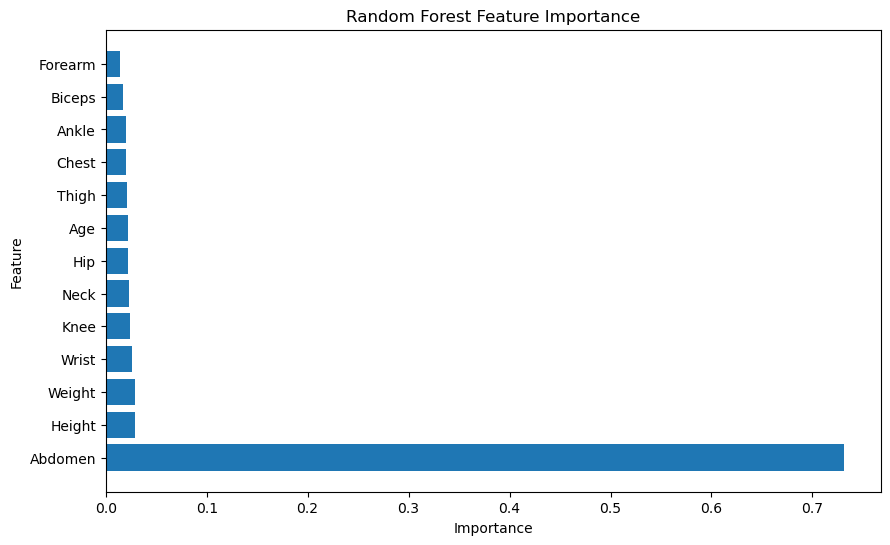

In [6]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('BMI.csv')

# Separate features (X) and target variable (y)
X = df.drop('fatpctg', axis=1)
y = df['fatpctg']

# Create a random forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the data
rf_model.fit(X, y)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance table
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()
